# Predicting Stocks with Fundamental Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("./data/PFE_quarterly_financial_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 41 columns):
Quarter end                                   94 non-null object
Shares                                        94 non-null int64
Shares split adjusted                         94 non-null int64
Split factor                                  94 non-null int64
Assets                                        94 non-null int64
Current Assets                                94 non-null int64
Liabilities                                   94 non-null int64
Current Liabilities                           94 non-null int64
Shareholders equity                           94 non-null int64
Non-controlling interest                      94 non-null int64
Preferred equity                              94 non-null int64
Goodwill & intangibles                        94 non-null int64
Long-term debt                                94 non-null int64
Revenue                                       94 non-null object

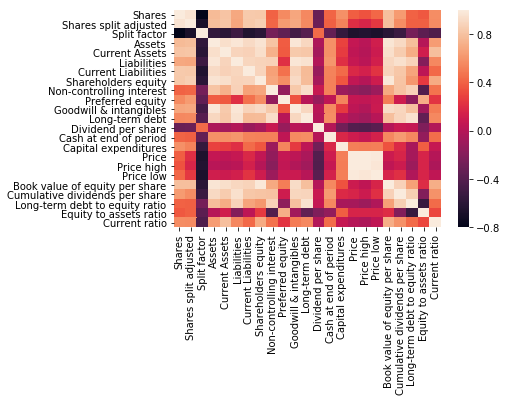

In [4]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [5]:
# Import factors to consider
# Input are : Quarter end, Shares, Capital expenditures, Current Liabilities, Current Assets

# Output should match: Price

In [6]:
df['Quarter end'] = pd.to_datetime(df['Quarter end'])
df.index = df['Quarter end']
del df['Quarter end']
df

,Shares,Shares split adjusted,Split factor,Assets,Current Assets,Liabilities,Current Liabilities,Shareholders equity,Non-controlling interest,Preferred equity,...,P/B ratio,P/E ratio,Cumulative dividends per share,Dividend payout ratio,Long-term debt to equity ratio,Equity to assets ratio,Net margin,Asset turnover,Free cash flow per share,Current ratio
Quarter end,,,,,,,,,,,,,,,,,,,,,
2017-04-02,5967844470,5967844470,1,168784000000,35878000000,110038000000,24864000000,58435000000,311000000,23000000,...,3.28,28.06,16.57,1.0023,0.6220,0.3461,0.1391,0.31,0.21,1.4430
2016-12-31,5951872174,5951872174,1,171615000000,38949000000,111776000000,31115000000,59543000000,296000000,24000000,...,3.06,31.91,16.25,1.0043,0.5275,0.3468,0.1366,0.31,0.87,1.2518
2016-10-02,6068355132,6068355132,1,178430000000,38501000000,114829000000,34759000000,63307000000,294000000,25000000,...,3.42,31.27,15.95,1.1633,0.4810,0.3547,0.1161,0.31,0.7,1.1077
2016-07-03,6065652424,6065652424,1,170658000000,43845000000,107592000000,32099000000,62769000000,297000000,25000000,...,3.4,28.97,15.65,1.0152,0.4854,0.3677,0.1337,0.31,0.51,1.3659
2016-04-03,6064849361,6064849361,1,162929000000,41298000000,99582000000,28735000000,63068000000,279000000,26000000,...,3.14,29.59,15.35,0.9219,0.4414,0.3869,0.149,0.31,0.22,1.4372
2015-12-31,6184139991,6184139991,1,167460000000,43804000000,102463000000,29399000000,64719000000,278000000,26000000,...,3.08,25.08,15.05,0.9931,0.4455,0.3863,0.1425,0.3,0.66,1.4900
2015-09-27,6173001952,6173001952,1,170867000000,45001000000,103743000000,27845000000,66838000000,286000000,27000000,...,3,23.03,14.77,0.8103,0.4352,0.3910,0.1744,0.29,0.76,1.6161
2015-06-28,6167347758,6167347758,1,160878000000,51715000000,93698000000,24143000000,66894000000,286000000,28000000,...,3.14,23.87,14.49,0.7513,0.3997,0.4156,0.1846,0.29,0.62,2.1420
2015-03-29,6157669933,6157669933,1,160640000000,49443000000,93053000000,20222000000,67304000000,283000000,28000000,...,2.86,23.4,14.21,0.7194,0.4366,0.4188,0.1869,0.29,0.07,2.4450


In [7]:
df = df['2017':'2007'] 

In [8]:
X = df[["Shares", "Capital expenditures", "Current Liabilities", "Current Assets"]]
y = df[["Price"]]

In [9]:
X.head()

,Shares,Capital expenditures,Current Liabilities,Current Assets
Quarter end,,,,
2017-04-02,5967844470,358000000,24864000000,35878000000
2016-12-31,5951872174,769000000,31115000000,38949000000
2016-10-02,6068355132,432000000,34759000000,38501000000
2016-07-03,6065652424,497000000,32099000000,43845000000
2016-04-03,6064849361,301000000,28735000000,41298000000


In [10]:
from sklearn import preprocessing

X = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

y = y.values #returns a numpy array
min_max_scalar = preprocessing.MinMaxScaler()
y = min_max_scalar.fit_transform(y)

/home/rameez/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
# X_test and y_test dont touch
X_test = X[-4:]
y_test = y[-4:]

In [12]:
X = X[:-4]
y = y[:-4]

In [13]:
X_val = X[-5:]
y_val = y[-5:]
X_train = X[:-5]
y_train = y[:-5]

In [14]:
print("X_train size: {}\nX_val size: {}\nX_test size: {}".format(len(X_train), len(X_val), len(X_test)))

X_train size: 32
X_val size: 5
X_test size: 4


## Deep Learning Model

In [15]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [16]:
print(X_train.shape, y_train.shape)

(32, 4) (32, 1)


In [17]:
model = Sequential()
model.add(Dense(32, input_dim=4))
model.add(Dense(10, activation='relu'))
model.compile(optimizer='sgd',
              loss='mse',
              metrics=['accuracy'])